<img src= 'bomdiafamilia.jpeg' width="300" height="300" >

# Introdução
#### Bom dia tias! Fiz esse trabalho para mostrar porquê não devemos compartilhar mensagens de zapzap com "prescrições de medicamentos" feitas por quem não é profissional da área.
#### Esses estudos são complexos, envolvem muito tempo, dados, pesquisas... e muitas vezes um composto pode ter uma ação colateral onde nem imaginamos... por isso é preciso ter uma visão longe de qualquer viés, analisando diversos efeito em diversos genes... segue abaixo.

# Capítulo [0] - Carregando e analisando a complexidade dos dados

<img src= 'Gatinho.jpeg' width="200" height="150" >

In [1]:
#Aqui estamos importando a biblioteca principal para analisarmos os dados e as tabelas base do estudo
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

Abaixo, veremos as 5 primeiras linhas da tabela para termos uma ideia dos seus dados e o seu tamanho. Aqui já vemos algumas coisas interessantes:

1 - O ID do composto é codificado, para que não exista qualquer víes na análise dos dados (coisa muito comum nos dias de hoje).
2 - A primeira tabela, que avalia droga, dosagem e tempo, possui 23814 linhas e 877 colunas. A segunda tabela, que trata das respostas aos tratamentos, possui 23814 linhas e 207 colunas; juntas totalizando quase 26 milhões de células (daí uma das importâncias do machine learning para cruzamento e análise desses dados).

In [9]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [10]:
dados.shape

(23814, 877)

In [11]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dados_resultados.shape

(23814, 207)

Abaixo temos um data frame com a distribuição dos compostos analisados. Podemos constatar que tivemos 3289 compostos avaliados (considerando também o controle).

In [31]:
drogas = pd.DataFrame(dados.droga.value_counts())
drogas

,droga
cacb2b860,1866
87d714366,718
9f80f3f77,246
8b87a7a83,203
5628cb3ee,202
...,...
98c4c858e,1
d9fcbe12c,1
b6b4f212d,1
07cca32e8,1


Segue a "droga" controle.

In [45]:
dados_com_controle = dados.query('tratamento == "com_controle"')['droga'].value_counts()
pd.DataFrame(dados_com_controle)

,droga
cacb2b860,1866


Aqui temos um resumo dos tipos de exposições diferentes (tempo e dosagem) que cada composto sofreu.

In [54]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['droga']).T

dose      D1       D2      
tempo     24 48 72 24 48 72
droga                      
00199ff52  1  1  1  1  1  1
00251fc41  1  1  1  1  1  1
00321ea80  2  2  2  2  2  2
0034c0847  1  1  1  1  1  1
0060e686f  1  1  1  1  1  1
...       .. .. .. .. .. ..
ff9565933  1  1  1  1  1  1
ffd66e220  1  1  1  1  1  1
ffe357f8f  0  1  0  0  0  0
ffed8e1c9  1  1  1  1  1  1
fff7d208d  1  1  1  1  1  1

[3289 rows x 6 columns]

# Capítulo [1] - Análise gráfica e estatística


<img src= 'meireles.jpg' width="300" height="300" >

Cada teste de tratamento possui um resultado heterogêneo para cada um dos genes e tipos celulares testado (resumo na tabela abaixo), por isso, a importância dos gráficos, para ajudar a ilustrar e entender o comportamento geral do estudo

In [58]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


In [136]:
#Aqui estamos importando as principais bibliotecas para plotarmos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Importante para a configuração padrão do gráfico
sns.set()

In [94]:
#Separando tabelas com a disribuição das ações máximas e mínimas nos testes com droga.
dados_com_droga = dados.query('tratamento == "com_droga"' )
dados_max_com_droga = pd.DataFrame(dados_com_droga.loc[:,'g-0':'g-771'].max())
dados_min_com_droga = pd.DataFrame(dados_com_droga.loc[:,'g-0':'g-771'].min())


In [95]:
#Separando tabelas com a disribuição das ações máximas e mínimas nos testes sem droga.
dados_com_controle = dados.query('tratamento == "com_controle"' )
dados_max_com_controle = pd.DataFrame(dados_com_controle.loc[:,'g-0':'g-771'].max())
dados_min_com_controle = pd.DataFrame(dados_com_controle.loc[:,'g-0':'g-771'].min())

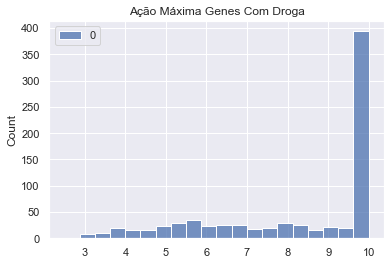

In [131]:
#Ação Máxima Genes Com Droga

ax = sns.histplot(data=dados_max_com_droga,bins=20)
ax.set_title('Ação Máxima Genes Com Droga')

plt.show()

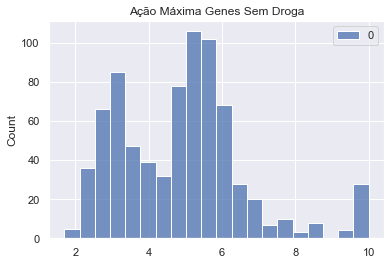

In [129]:
#Ação Máxima Genes Sem Droga
ay = sns.histplot(data=dados_max_com_controle,bins=20)
ay.set_title('Ação Máxima Genes Sem Droga')
plt.show()

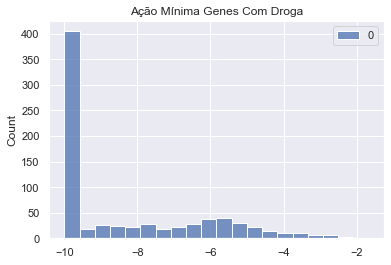

In [132]:
#Ação Mínima Genes Com Droga

ax = sns.histplot(data=dados_min_com_droga,bins=20)
ax.set_title('Ação Mínima Genes Com Droga')

plt.show()

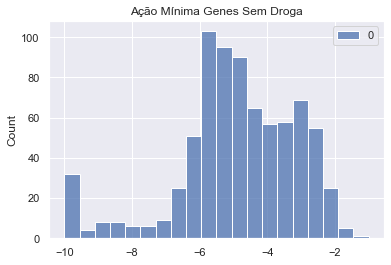

In [133]:
#Ação Mínima Genes sem Droga

ax = sns.histplot(data=dados_min_com_controle,bins=20)
ax.set_title('Ação Mínima Genes Sem Droga')

plt.show()

Como vimos nos gráficos anteriores, o comportamento nos genes varia muito diante das substâncias, dependo da ação resultante, podendo ser um efeito desejado ou não, contudo, cada impacto deve ser avaliado,

In [142]:
corr = dados.loc[:,'g-0':'g-100'].corr()
corr.head(1)

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100
g-0,1.0,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.526045,0.472513,0.114816,0.144616,0.536962,-0.540144,0.634276,-0.555911,-0.19658,0.670014


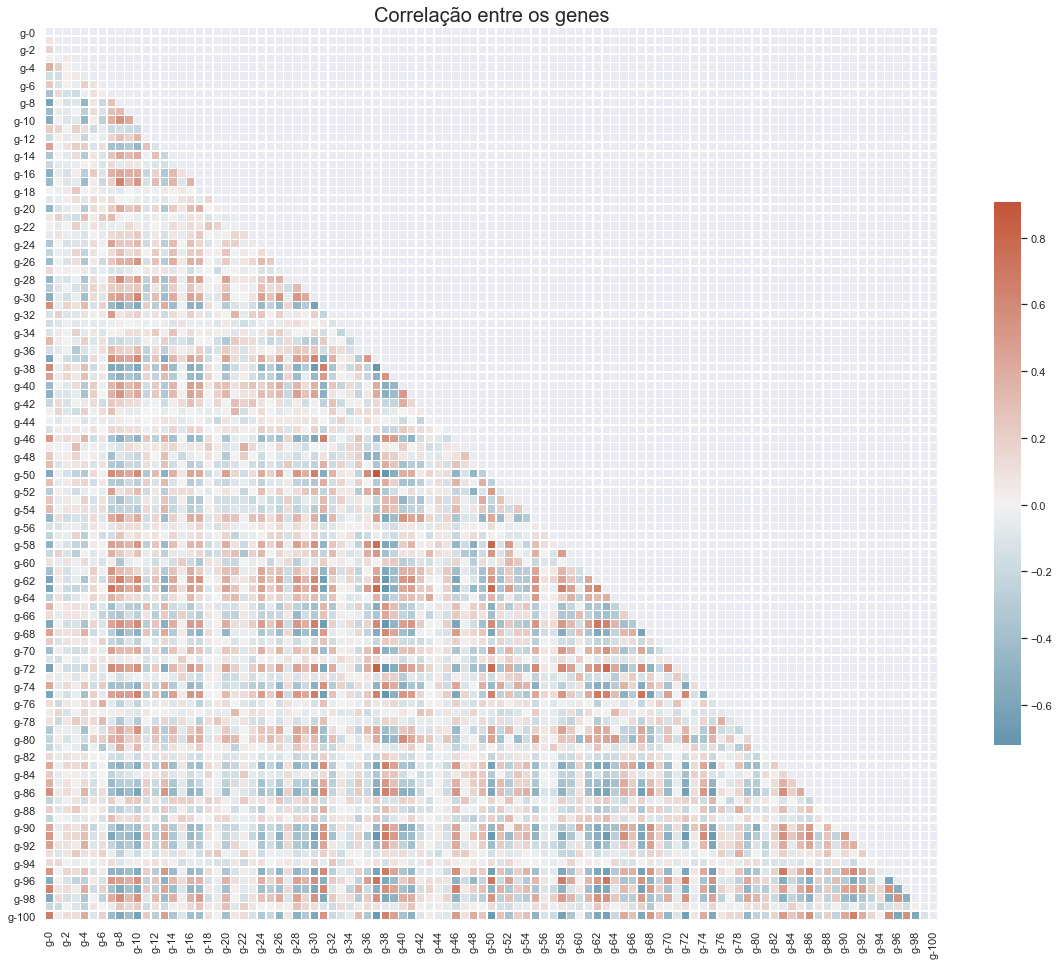

In [147]:

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Correlação entre os genes', fontsize=20)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

O gráfico acima mostra a correlação entre os genes, mostrando como uma ação é "sentida proporcionalmente" entre os genes.

Abaixo vemos nos gráficos de dispersão, como se comportaram os testes com droga e sem droga e a relação entre 2 genes. Isso é para reforçar que tudo deve ser avaliado. As vezes um determinado composto tem uma ação pretendida, porém, ele acaba afetando outra área.

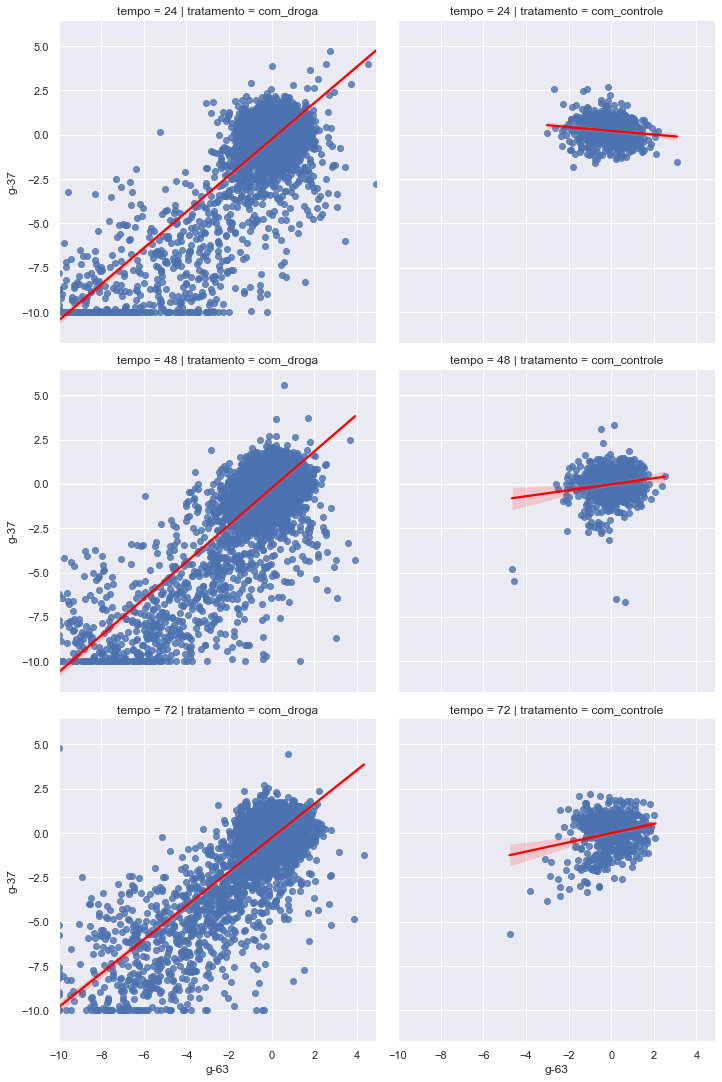

In [149]:
sns.lmplot(data=dados, x='g-63', y='g-37', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

# Capítulo [2] - Proposta de machine learning

<img src= 'orgulho.jpg' width="300" height="200" >

Então tias, como vimos até aqui, foi um monte de informações, o que seria impossível para um ser humano analisar, relacionar, gerar um modelo de predição... para isso existe um machine learning! O computador chegará a uma conclusão, baseado em um algoritmo definido.

Existem inúmeros modelos para se escolher, conforme a figura abaixo. Vamos tentar testar algum.

<img src= 'ml_map.png'>

Agora precisamos compilar o resultado da ativação com o tratamento, para podermos criar um modelo que chegue à conclusão se determinado composto/tratamento, produzirá uma ativação.

In [150]:
# Somatório de mecanismos de ativação dos resultados. Caso o resultado seja 0, ativo_moa = False
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head(1)

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [165]:
# Junção do resultado(n_moa e ativo_moa) com a base de dados do experimento
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
# Transformando as variáveis categóricas do experimento em resultados binários, para facilitar a vida do modelo de machine learnig
dados_combinados = pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])
dados_combinados.head(1)

,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,-1.022,-0.0326,...,0.4176,1,True,0,1,1,0,1,0,0


In [186]:
#Separando treino e teste. Os dados avaliados serão todos os dados numéricos da planilha e o alvo será se ele foi ativado ou não.
# Foi destinado 70% da base para treinar e 30% para ver o quão bem ele aprendeu.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=5)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)
print("Acurácia Random Forest: {0:.2%}".format(modelo_randomforest.score(x_teste, y_teste)))

Acurácia Random Forest: 69.01%


In [187]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=5)
accuracy_all = []



clf = SGDClassifier()
clf.fit(x_treino, y_treino)
prediction = clf.predict(x_teste)
accuracy_all.append(accuracy_score(prediction, y_teste))


print("Acurácia SGD Classifier: {0:.2%}".format(accuracy_score(prediction, y_teste)))



Acurácia SGD Classifier: 62.97%


In [188]:
from sklearn.svm import LinearSVC
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=5)
accuracy_all = []
clf = LinearSVC()
clf.fit(x_treino, y_treino)
prediction = clf.predict(x_teste)
accuracy_all.append(accuracy_score(prediction, y_teste))

print("Acurácia do LinearSVC: {0:.2%}".format(accuracy_score(prediction, y_teste)))

Acurácia do LinearSVC: 61.41%


C:\Users\a4mj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [190]:
from sklearn.neighbors import KNeighborsClassifier
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=5)
accuracy_all = []

clf = KNeighborsClassifier()
clf.fit(x_treino, y_treino)
prediction = clf.predict(x_teste)

accuracy_all.append(accuracy_score(prediction, y_teste))


print("Acurácia do Kneighbors: {0:.2%}".format(accuracy_score(prediction, y_teste)))

Acurácia do Kneighbors: 61.64%


In [193]:
from sklearn.naive_bayes import GaussianNB
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=5)
accuracy_all = []

clf = GaussianNB()
clf.fit(x_treino, y_treino)
prediction = clf.predict(x_teste)

accuracy_all.append(accuracy_score(prediction, y_teste))

print("Acurácia do GaussianNB: {0:.2%}".format(accuracy_score(prediction, y_teste)))

Acurácia do GaussianNB: 46.94%


# Capítulo [3] - Conclusão

Tias Conceião, Celinha, Neuza, Rita... e todas as tias do mundo; o que concluo desse trabalho é que diretamente, eu não sou capaz de concluir nada, apenas que nesse campo de drug discovery é necessário muita pesquisa, ética, investimento e cientistas altamente capazes, tanto no campo da biomedicina quanto da ciência de dados, portanto, quando receberem um zapzap sobre um medicamento, ou uma indicação de figura pública que não seja médico ou da área da pesquisa, verifique.

Procure se a informação é fake, procure se existe algum estudo sobre... Nossa saúde vale essa pesquisa!<br>
https://g1.globo.com/fato-ou-fake/<br>
https://www.nejm.org/doi/full/10.1056/NEJMoa2019014?query=featured_home<br>
https://www.bbc.com/portuguese/geral-54360958<br>
https://saude.ig.com.br/2021-01-21/covid-19-cloroquina-vai-da-eficacia-nao-comprovada-a-ineficacia-comprovada.html<br>

<img src= 'tia.jpg' width="300" height="200" >